## Observations and Insights 

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [90]:
# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [91]:
# Checking the number of mice in the DataFrame.
mice_count = merge_data.groupby("Mouse ID")
print(len(unique_mouse))

249


In [92]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = merge_data.loc[merge_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [93]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge_data = merge_data[merge_data['Mouse ID'].isin(dup_mouse_id)==False]
clean_merge_data.head()
sort_data = clean_merge_data.sort_values(["Timepoint", "Mouse ID"], ascending = True)
sort_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.0,0
464,a251,Infubinol,Female,21,25,0,45.0,0
474,a262,Placebo,Female,17,29,0,45.0,0
484,a275,Ceftamin,Female,20,28,0,45.0,0
494,a366,Stelasyn,Female,16,29,0,45.0,0


In [94]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = sort_data.groupby("Mouse ID")
print(len(clean_mice_count))

248


## Summary Statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group_stats = sort_data.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

drug_group_stats.head()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

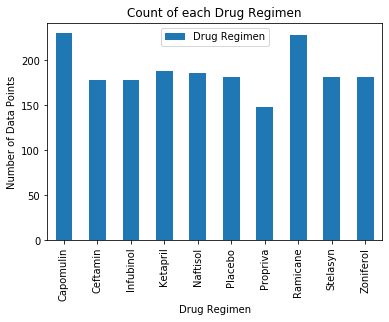

In [72]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

drug_group = sort_data.groupby('Drug Regimen')  
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())
drug_count_bar_chart = drug_group_count.plot(kind='bar', title="Count of each Drug Regimen")
drug_count_bar_chart.set_xlabel("Drug Regimen")
drug_count_bar_chart.set_ylabel("Number of Data Points")
plt.show()

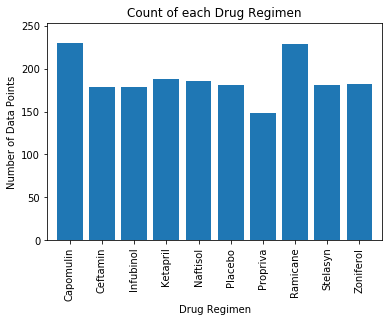

In [73]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, drug_group_count["Drug Regimen"], align="center")
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.1)

plt.title("Count of each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

## Pie Plots

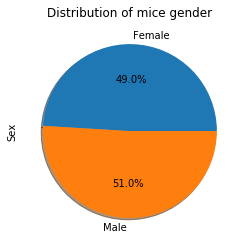

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = sort_data.groupby('Sex')
gender_group_count = pd.DataFrame(gender_group['Sex'].count())
gender_group_count.plot(kind='pie', y='Sex', title="Distribution of mice gender",autopct='%1.1f%%',shadow=True, legend =False)

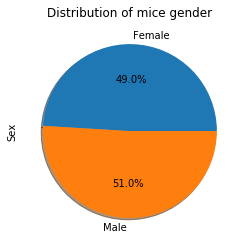

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_group_count.index.values)
gender_counts = gender_group_count['Sex']
plt.pie(gender_counts, labels=genders,autopct="%1.1f%%", shadow=True)
plt.title("Distribution of mice gender")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
most_effe_drugs = drug_group_stats.sort_values(["Tumor_Vol_Mean"])
most_effe_drugs.head()

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Ramicane,40.217,40.673,23.487,4.846,0.321
Capomulin,40.676,41.558,24.948,4.995,0.329
Propriva,52.321,50.446,43.852,6.622,0.544
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492


In [100]:
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs = sort_data[sort_data['Drug Regimen'].isin(four_drug_list)]
four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.0,0
464,a251,Infubinol,Female,21,25,0,45.0,0
484,a275,Ceftamin,Female,20,28,0,45.0,0
318,a411,Ramicane,Male,3,22,0,45.0,0
421,a444,Ramicane,Female,10,25,0,45.0,0


In [101]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

four_last_tumor.head()

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159

In [102]:
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
four_last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,NaN,43.048


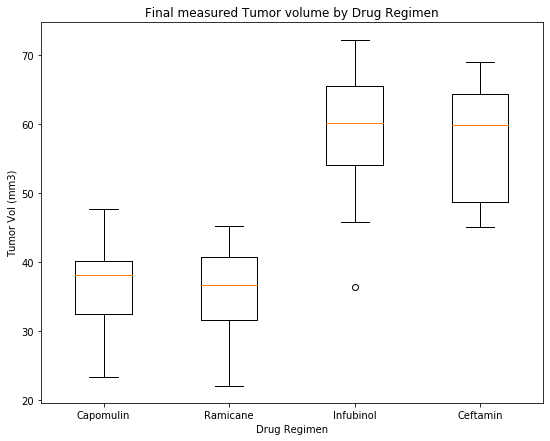

In [104]:
counter = 0
for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
boxplot_list = []
for drug in four_drug_list:
    boxplot_list.append(list(four_last_tumor_unstack[drug].dropna()))

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='o')
plt.xticks([1,2,3,4],four_drug_list)


plt.show()

## Line and Scatter Plots

In [106]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Create a dataframe for only the Capomulin data
capomulin_data = sort_data.loc[sort_data['Drug Regimen'] == 'Capomulin']
capomulin_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.0,0
290,b742,Capomulin,Male,7,21,0,45.0,0
60,f966,Capomulin,Male,16,17,0,45.0,0
235,g288,Capomulin,Male,3,19,0,45.0,0
351,g316,Capomulin,Female,22,22,0,45.0,0


In [107]:
cap_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Mouse_weight=('Weight (g)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(3)
cap_mouse_id.head()

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.964
b742,21,40.084
f966,17,36.506
g288,19,41.990
g316,22,44.613


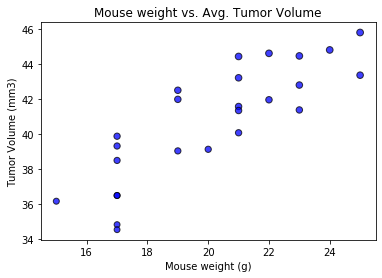

In [109]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(
    cap_mouse_id['Mouse_weight'],
    cap_mouse_id['Tumor_vol_mean'],
    marker='o',
    facecolors='blue',
    edgecolors='black',
    s=cap_mouse_id['Tumor_vol_mean'],
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()



## Correlation and Regression

The r-squared is: 0.8419461020261081
The equation of the regression line is: y = 0.95x + 21.55


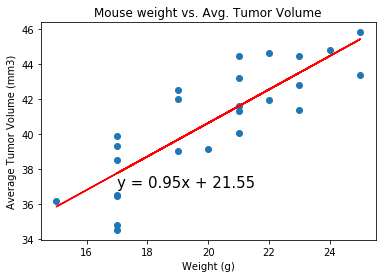

In [110]:
# Calculate the correlation coefficient and linear regression model 

x_values = cap_mouse_id['Mouse_weight']
y_values = cap_mouse_id['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")


plt.show()
